In [1]:
import os
import shutil
import numpy as np
from glob import glob
!pip install efficientnet
from efficientnet.preprocessing import center_crop_and_resize
import tensorflow as tf
from PIL import Image


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 3.9 MB/s 


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls

drive  sample_data


In [ ]:
%cd ./drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [ ]:
classes = os.listdir('./FacialClassification')
classes.remove('split.ipynb')
imgs=[]
for i in classes :
  img=glob(os.path.join('FacialClassification/',i, '*jpg'))
  np.random.shuffle(img)
  imgs.append(img)


In [ ]:
type(imgs[0][0])

str

In [ ]:
tr_r=0.75
train=[]
test=[]
for i in imgs:
  cl=int(len(i)*tr_r)

  train.append(i[:cl])
  test.append(i[cl:])

In [ ]:
os.path.split(train[0][0])

('FacialClassification/불안',
 '8be437645d02eee9dddd2cccda6657c3a08e162cdb36b7a9a9c76473582cbb30_남_20_슬픔_상업시설&점포&시장_20210126213039-003-005.jpg')

In [ ]:
def copy_to(L, to, size):
    if not os.path.exists(to):
        os.makedirs(to)
    
    for p in L:
        name = os.path.split(p)[1]
        img=Image.open(p)#.CONVERT('RGB')
        # img=np.array(Image.open(p))
        #img=center_crop_and_resize(img,size) 
        # img=Image.fromarray((img).astype(np.uint8))
        img=img.resize((int(size),int(size)))
        img.save(os.path.join(to,name))


In [ ]:
#train_root = 'FacialClassification/train'
#test_root = 'FacialClassification/test'
train_root=[]
test_root=[]
for i in classes :
  train_root.append('FacialClassifiaction/train/'+i)
  test_root.append('FacialClassifiaction/test/'+i)


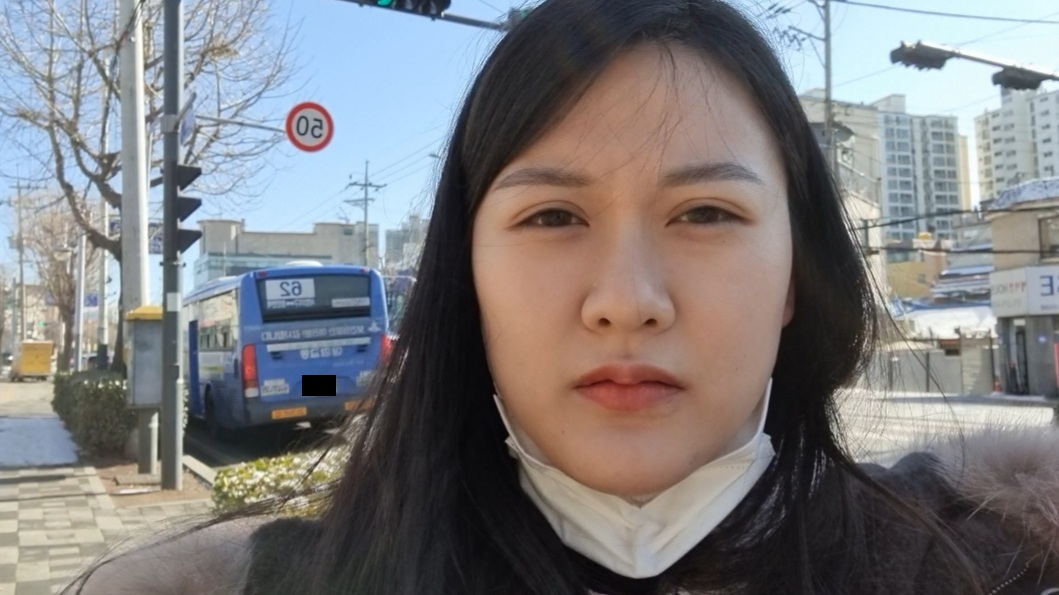

In [ ]:
p=train[0][0]
img=Image.open(p)
img

In [ ]:
for i in range(len(train_root)) : 
    copy_to(train[i], train_root[i],224)
    copy_to(test[i], test_root[i],224)

In [ ]:
# img=img.resize((224,224))
#img
# print(type(img))
size=224
img=np.array(img)

img=center_crop_and_resize(img,size) 
img=Image.fromarray(np.uint8(img))

In [ ]:
import matplotlib.pyplot as plt


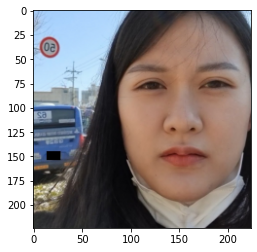

In [ ]:
plt.imshow(img)
plt.show()

TypeError: ignored